In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mtcar = pd.read_excel('./dataset/MTcars.xlsx')
mtcar.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Problem Statement
- independent varibles are hp and wt
- target is am (a=0 , m =1)


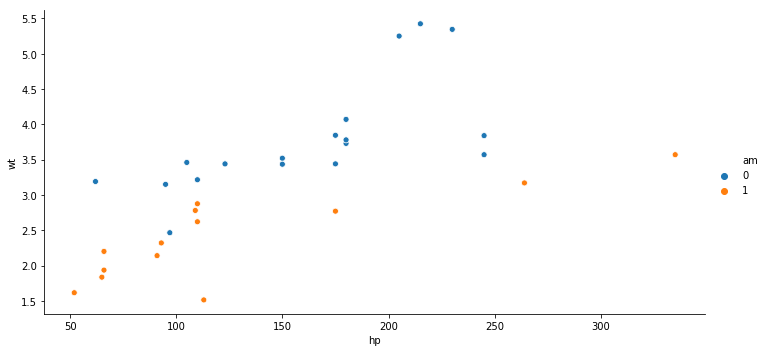

In [3]:
# scatter 
sns.relplot(x='hp',y='wt',kind='scatter',data=mtcar,aspect=2,hue='am')

# Logistic Regression

In [4]:
# GLM
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
mtcar.keys()

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [6]:
model = smf.glm(formula='am~hp+wt',data=mtcar,
                family=sm.families.Binomial()).fit()

In [7]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     am   No. Observations:                   32
Model:                            GLM   Df Residuals:                       29
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5.0296
Date:                Wed, 20 Mar 2019   Deviance:                       10.059
Time:                        10:37:07   Pearson chi2:                     15.0
No. Iterations:                     8   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.8663      7.444      2.535      0.011       4.277      33.455
hp             0.0363      0.018      2.044      0.0

#  $ ln(s) = a + b_1 * x_1 + b_2 *x_2 $ 

> ## $ odds ratio = s = \frac{p}{1-p} $

asuume p = 0.5

$ => s = 1 => ln(1) = 0$

$ 0 = 18.8663 + 0.0363*hp -8.8035*wt $ 

In [13]:
hp = mtcar['hp']
wt = (18.8663+0.0363*hp)/8.8035

In [14]:
wt_sig = 18.8663/8.8035
wt_sig = np.ones(32)*wt_sig

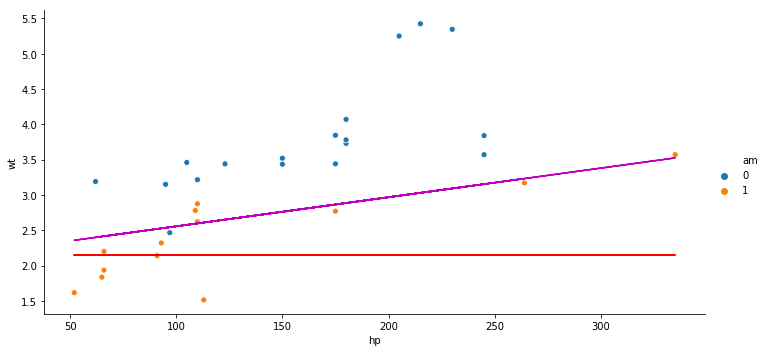

In [16]:
sns.relplot(x='hp',y='wt',kind='scatter',data=mtcar,aspect=2,hue='am')
plt.plot(hp,wt,'m')
plt.plot(hp,wt_sig,'r')

### Splitting data into Training and Testing set
- 80 % training
- 20 % testing

In [19]:
X = mtcar[['hp','wt']]
y = mtcar['am']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25, 2), (7, 2), (25,), (7,))

In [30]:
train = pd.concat((x_train,y_train),axis=1)
test = pd.concat((x_test,y_test),axis=1)

In [39]:
# logistic regression
model = smf.glm(formula='am~hp+wt',data=train,
                family=sm.families.Binomial()).fit()
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     am   No. Observations:                   25
Model:                            GLM   Df Residuals:                       22
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4.8541
Date:                Wed, 20 Mar 2019   Deviance:                       9.7081
Time:                        11:08:08   Pearson chi2:                     13.5
No. Iterations:                     7   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.3530      7.472      2.323      0.020       2.709      31.997
hp             0.0343      0.017      1.977      0.0

# SkLearn

In [34]:
from sklearn.linear_model import LogisticRegression

In [36]:
model_sk = LogisticRegression()

In [37]:
model_sk.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# statsmodel
y_pred_stat = model.predict(x_test)

In [42]:
def prob2value(prob):
    if prob > 0.5:
        return 1
    else:
        return 0

In [44]:
y_pred_stat_val = y_pred_stat.apply(prob2value)
y_pred_stat_val

23    0
4     0
11    0
24    0
15    0
25    1
22    0
dtype: int64

In [45]:
y_test

23    0
4     0
11    0
24    0
15    0
25    1
22    0
Name: am, dtype: int64

In [ ]:
!pip install pandas_ml

In [46]:
from pandas_ml import ConfusionMatrix

In [48]:
cm = ConfusionMatrix(y_test,y_pred_stat_val)
cm

Predicted  False  True  __all__
Actual                         
False          6     0        6
True           0     1        1
__all__        6     1        7

In [60]:
cm.stats()

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


OrderedDict([('population', 7),
             ('P', 1),
             ('N', 6),
             ('PositiveTest', 1),
             ('NegativeTest', 6),
             ('TP', 1),
             ('TN', 6),
             ('FP', 0),
             ('FN', 0),
             ('TPR', 1.0),
             ('TNR', 1.0),
             ('PPV', 1.0),
             ('NPV', 1.0),
             ('FPR', 0.0),
             ('FDR', 0.0),
             ('FNR', 0.0),
             ('ACC', 1.0),
             ('F1_score', 1.0),
             ('MCC', 1.0),
             ('informedness', 1.0),
             ('markedness', 1.0),
             ('prevalence', 0.14285714285714285),
             ('LRP', inf),
             ('LRN', 0.0),
             ('DOR', inf),
             ('FOR', 0.0)])

In [61]:
cm.stats_overall

C:\Users\srikanth\Anaconda\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 1.0),
             ('95% CI', (0.5903836027749966, nan)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.3399166770891136),
             ('Kappa', 1.0),
             ("Mcnemar's Test P-Value", 'ToDo')])